# Machine Learning For Managers(Term 03)


# Project Overview

## Objective of the Report

The objective of this report is to assess and compare the effectiveness of K-means and OPTICS clustering methods in analyzing a dataset containing salary information for 80,000 employees. The report aims to provide insights into the suitability of each method for managerial decision-making processes, focusing on three main aspects: clustering characteristics, resource utilization (memory and time), and the interpretability of the resulting clusters.

**1. Clustering Characteristics:**

- Evaluate the number and characteristics of clusters generated by K-means and OPTICS.
- Assess the granularity and distinctiveness of the clusters in capturing different salary groups within the dataset.
- Determine the effectiveness of each method in segmenting the salary data into meaningful groups based on various factors such as salary level, job title, and years of experience.

**2. Resource Utilization:**

- Measure the computational resources (memory and time) required for performing clustering analysis using both methods.
- Compare the efficiency of K-means and OPTICS in terms of processing time and memory consumption.
- Provide insights into the scalability of each method for handling large datasets such as the one used in this analysis.

**3. Composition of Clusters:**

- Analyze the composition of clusters generated by K-means and OPTICS, focusing on salary distribution and job categories.
- Evaluate the coherence and consistency of salary patterns within each cluster.
- Identify any outliers or unusual salary data points that may impact the overall quality of clustering results.

The report aims to offer a comprehensive comparison of K-means and OPTICS clustering methods to guide managerial decisions regarding the most suitable approach for analyzing salary data of a large workforce. The findings will help stakeholders understand the strengths and limitations of each method and make informed decisions on utilizing clustering analysis for similar projects in the future.


In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np


In [2]:
df=pd.read_csv("Salaries.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                80000 non-null  int64  
 1   EmployeeName      80000 non-null  object 
 2   JobTitle          80000 non-null  object 
 3   BasePay           80000 non-null  float64
 4   OvertimePay       80000 non-null  float64
 5   OtherPay          80000 non-null  float64
 6   TotalPay          80000 non-null  float64
 7   TotalPayBenefits  80000 non-null  float64
 8   Year              80000 non-null  int64  
 9   Agency            80000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 6.1+ MB


In [4]:
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011,San Francisco


## K-Means

K-means is an unsupervised machine learning technique that allow us to cluster data points. This enables us to find patterns in the data that can help us analyze it more effectively. K-means is an iterative algorithm, which means that it will converge to the optimal clustering over time.

## To run a k-means clustering:

1. Specify the number of clusters you want (usually referred to as k).
2. Randomly initialize the centroid for each cluster. The centroid is the data point that is in the center of the cluster.
3. Determine which data points belong to which cluster by finding the closest centroid to each data point.
4. Update the centroids based on the geometric mean of all the data points in the cluster.
5. Run 3 and 4 until the centroids stop changing. Each run is referred to as an iteration.


In [5]:
f=["BasePay","OvertimePay","OtherPay","TotalPay","TotalPayBenefits"]

In [6]:
df=df.dropna(subset=f)

In [7]:
data=df[f].copy()

In [8]:
data

,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,167411.18,0.00,400184.25,567595.43,567595.43
1,155966.02,245131.88,137811.38,538909.28,538909.28
2,212739.13,106088.18,16452.60,335279.91,335279.91
3,77916.00,56120.71,198306.90,332343.61,332343.61
4,134401.60,9737.00,182234.59,326373.19,326373.19
...,...,...,...,...,...
79995,117339.52,0.00,6537.32,123876.84,160337.30
79996,115802.67,0.00,0.00,115802.67,160333.49
79997,114762.12,4891.48,4677.43,124331.03,160328.86
79998,94386.87,23421.26,8988.95,126797.08,160320.04


In [9]:
data=((data - data.min()) / (data.max() - data.min())) * 10 +1 

In [10]:
data.describe()

,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,3.213473,1.234396,1.106930,2.419433,2.698181
std,1.396686,0.516418,0.224615,0.937613,1.145639
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.245673,1.000000,1.000049,1.765788,1.858499
50%,3.090615,1.000000,1.026488,2.307534,2.594570
75%,4.253560,1.224072,1.127706,3.086430,3.445127
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [11]:
data.head()


,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,6.245951,1.000000,11.000000,11.000000,11.000000
1,5.887664,11.000000,4.443698,10.494602,10.494602
2,7.664928,5.327800,1.411126,6.907023,6.907023
3,3.444333,3.289409,5.955390,6.855290,6.855290
4,5.212596,1.397215,5.553767,6.750102,6.750102


In [12]:
def random_centroids(data, k) :
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [13]:
centroids = random_centroids(data,5)


In [14]:
centroids

,0,1,2,3,4
BasePay,2.699798,1.812116,4.143124,2.694133,3.126188
OvertimePay,1.105390,1.000000,1.000000,2.556592,1.000000
OtherPay,1.000000,1.023198,1.366092,1.000000,1.015593
TotalPay,4.953715,3.360939,1.096829,2.285867,1.903557
TotalPayBenefits,1.735843,1.329681,1.968622,4.997200,1.567677


In [15]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [16]:
labels = get_labels(data,centroids)

In [17]:
labels.value_counts()

4    56404
3    16803
2     6606
1      131
0       56
dtype: int64

In [18]:
def new_centroids(data, labels,k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [20]:
#converting data into 2-d data

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

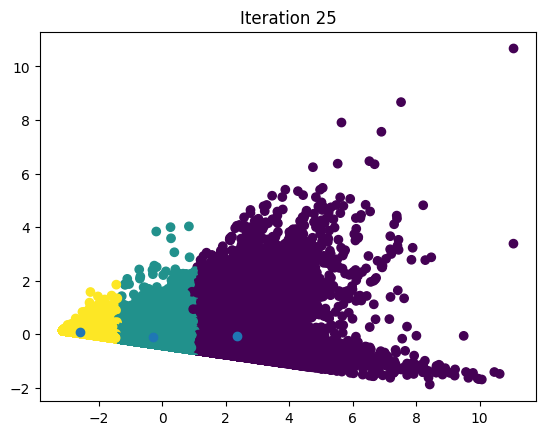

In [21]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

## Inference:

The above graph implements K-means clustering with three centroids and a maximum of 100 iterations on the salary data, using features such as BasePay, OvertimePay, OtherPay, TotalPay, and TotalPayBenefits. The generated graph visually represents the clustering process and can be analyzed as follows:

1. **Cluster Separation**: Identify distinct clusters formed by data points, indicating groups of employees with similar salary characteristics.

2. **Centroid Positions**: Observe the positions of centroids within clusters, representing mean salary values. They serve as reference points for understanding cluster central tendencies.

3. **Convergence**: Assess whether centroids stabilize across iterations, indicating convergence and stable cluster assignments.

4. **Cluster Size**: Analyze the size of each cluster to understand the distribution of data points among clusters.

5. **Cluster Interpretation**: Interpret characteristics of each cluster based on included features, such as higher BasePay and TotalPayBenefits indicating higher-paid positions.

Overall, the graph offers insights into salary distribution patterns among employees based on selected features and clustering analysis.

In [22]:
centroids

,0,1,2
BasePay,4.808250,3.050159,1.389672
OvertimePay,1.380675,1.138057,1.016248
OtherPay,1.211884,1.059096,1.022508
TotalPay,3.528629,2.268148,1.246947
TotalPayBenefits,4.025253,2.509257,1.276529


In [23]:
labels.value_counts()

1    36426
0    23901
2    19673
dtype: int64

In [24]:
df[labels == 2][["EmployeeName"] + f]

,EmployeeName,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
15519,DWIGHT LEE,14347.26,14603.39,46897.08,75847.73,75847.73
16119,BASIL CANION,12033.10,13160.61,48717.06,73910.77,73910.77
18471,MICHAEL GONZALES,8878.07,24147.13,34404.14,67429.34,67429.34
19058,PETER LEONARD,0.00,1630.20,64356.03,65986.23,65986.23
19840,MITCHELL KATZ,14949.61,0.00,48764.03,63713.64,63713.64
...,...,...,...,...,...,...
72920,Charles Williams,-30.58,45.87,0.00,15.29,16.65
72921,John Carajan,0.00,0.00,0.00,0.00,12.90
72922,John Draper,-9.50,14.25,0.00,4.75,5.17
72923,Cherise Wong,0.00,0.00,3.28,3.28,4.16


In [25]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [26]:
pd.DataFrame(kmeans.cluster_centers_, columns=f).T

,0,1,2
BasePay,4.931821,3.159032,1.482585
OvertimePay,1.537684,1.172486,1.021025
OtherPay,1.247034,1.068176,1.026251
TotalPay,3.616278,2.334733,1.296261
TotalPayBenefits,4.145100,2.597370,1.337535


## Elbow Chart for K-Means Clustering

The Elbow Chart is a graphical tool used in K-Means clustering to help determine the optimal number of clusters (K) for a given dataset. The chart plots the within-cluster sum of squares (inertia) against the number of clusters. The "elbow" of the graph is identified as the point where the rate of decrease in inertia slows down, indicating the optimal K.

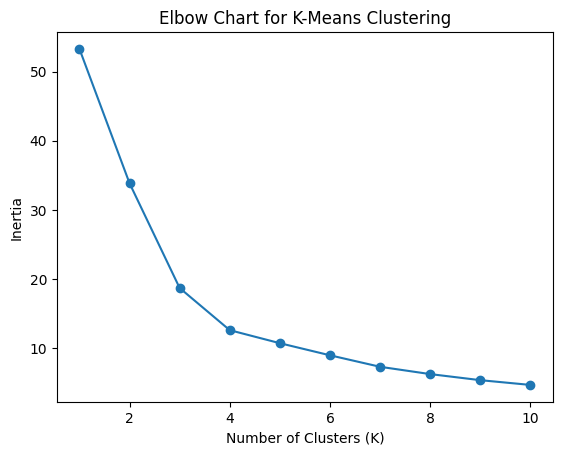

In [27]:
import warnings
import os

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
os.environ["OMP_NUM_THREADS"] = "2"

data = df[['BasePay', 'TotalPay']].values

# For the purpose of this example, let's create a simple 2D dataset
np.random.seed(42)
data = np.random.rand(300, 2)

# Run K-Means for different values of K
max_k = 10
inertia_values = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)  
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow chart
plt.plot(range(1, max_k + 1), inertia_values, marker='o')
plt.title('Elbow Chart for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


## Inference:

The generated elbow curve determine the optimal number of clusters (K) for K-means clustering on a 2D dataset.

- **Elbow Point Identification**: Observe the plot for the point where the inertia (within-cluster sum of squares) starts to decrease at a slower rate. This point is known as the "elbow point."
  
- **Optimal Number of Clusters**: The optimal number of clusters corresponds to the K value at the elbow point. It represents the point where adding more clusters does not significantly decrease inertia.

- **Interpretation**: In the elbow curve, the inertia values decrease as the number of clusters increases. However, the rate of decrease slows down after the elbow point. This suggests that adding more clusters beyond this point may not lead to substantial improvement in clustering performance.

- **Trade-off**: The optimal number of clusters should be chosen based on the trade-off between model complexity and clustering performance. A higher number of clusters may result in overfitting, while a lower number of clusters may lead to underfitting.

- **Application**: Once the optimal number of clusters is determined from the elbow curve, it can be used to perform K-means clustering on the dataset with the selected number of clusters, providing a suitable segmentation of the data into distinct groups.

The elbow curve provides valuable insights into selecting the optimal number of clusters for K-means clustering, helping in making informed decisions about the clustering model's complexity and performance.

## OPTICS Clustering

OPTICS (Ordering Points To Identify the Clustering Structure) is a density-based clustering algorithm. 
It extends DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to overcome limitations related to sensitivity to parameter choices and difficulties in handling clusters with varying densities.

### Key Concepts and Features of OPTICS:

OPTICS, a density-based clustering algorithm reminiscent of DBSCAN, identifies clusters by assessing the density of points within the data space. This methodology hinges on two key distance metrics. Firstly, the core distance denotes the distance at which a point attains core status, having a specific number of neighbors within a designated radius. Secondly, the reachability distance is defined as the maximum of a point's core distance and the distance to its nearest neighbor, effectively capturing the density structure of the data.

A notable feature of OPTICS is its production of a reachability plot, a graphical representation showcasing the reachability distances of each data point. This plot serves as a visual guide, offering insights into the inherent clustering structure within the dataset.

One distinctive aspect of OPTICS lies in its parameter-free design, rendering it less sensitive to user-specified parameters compared to DBSCAN. There is no prerequisite for users to specify the exact number of clusters beforehand, contributing to the algorithm's flexibility and adaptability to varying datasets.vity of the data.

C:\Users\Akanksha Sharma\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Estimated no. of clusters: 112
Estimated no. of noise points: 76129


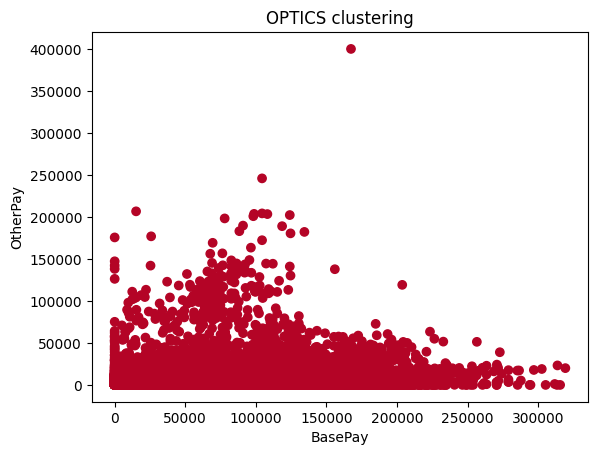

In [28]:
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

# As we have a DataFrame named df with features 'Feature1' and 'Feature2'
# Replace these column names with your actual feature names
features = ['BasePay', 'OtherPay']

# Configuration options
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'

# Extract features from your DataFrame
X = df[features].values

# Compute OPTICS
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:, 0], X[:, 1], c=colors, marker="o", picker=True)
plt.title('OPTICS clustering')
plt.xlabel('BasePay')
plt.ylabel('OtherPay')
plt.show()


## Inference:  

The code implements OPTICS (Ordering Points to Identify the Clustering Structure) clustering on the salary data based on the 'BasePay' and 'OtherPay' features.The scatter plot inferences:

- **Estimated Number of Clusters**: The code estimates the number of clusters present in the data. This information is valuable for understanding the underlying structure of the dataset and identifying distinct groups of employees based on their salary characteristics.

- **Estimated Number of Noise Points**: Additionally, the code calculates the number of noise points, which are data points that do not belong to any cluster. Noise points may represent outliers or data points that do not fit well into any cluster.

- **Cluster Visualization**: The scatter plot visualizes the clusters identified by OPTICS. Each data point is represented by a marker, with different colors indicating different clusters. This visualization allows for the examination of the spatial distribution of data points and the shape of the identified clusters.

- **Interpretation**: Analyzing the scatter plot, observe the distribution of data points and the separation between clusters. Evaluate the cohesion within clusters and the separation between them to assess the effectiveness of the clustering algorithm in capturing the underlying structure of the data.

- **Cluster Characteristics**: Interpret the characteristics of each cluster based on the 'BasePay' and 'OtherPay' features. Identify clusters with similar salary patterns and analyze any notable differences between clusters.

The scatter plot generated by OPTICS clustering provides insights into the clustering structure of the salary data, helping to understand the segmentation of employees based on their salary attributes.

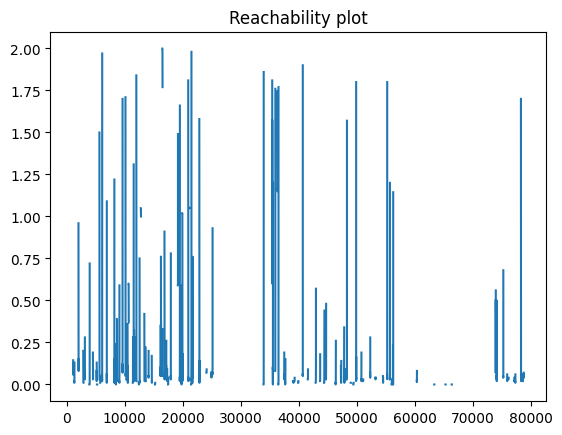

In [29]:
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

## Inference:

- **Visualization**: The reachability plot provides a visual representation of the reachability distances of data points.
  
- **Density Transitions**: Peaks and valleys in the plot indicate shifts between density regions within the dataset.

- **Cluster Boundaries**: The plot assists in identifying boundaries between clusters, marked by sharp increases in reachability distances.

- **Cluster Hierarchy**: It helps in understanding the hierarchical clustering structure, revealing connectivity and separation between clusters.

- **Cluster Density**: Insights into variations in cluster density are gained, with higher reachability distances suggesting sparser regions and lower distances indicating denser areas.

- **Interpretation Aid**: The plot aids in interpreting and analyzing the clustering results, offering valuable insights into the dataset's clustering structure.

In [30]:
# Determine core samples and noise points
core_distances = db.reachability_[db.ordering_]
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[core_distances < np.inf] = True  # If reachability distance is finite, consider it as core sample

noise_samples = X[labels == -1]
core_samples = X[core_samples_mask]

print('Core samples:', core_samples)
print('Noise points:', noise_samples)


Core samples: [[164352.66   3287.95]
 [164352.66   3287.95]
 [164352.66   3287.95]
 ...
 [ 78473.5    5886.5 ]
 [128117.5    1249.5 ]
 [114654.     9543.04]]
Noise points: [[167411.18 400184.25]
 [155966.02 137811.38]
 [212739.13  16452.6 ]
 ...
 [114762.12   4677.43]
 [ 94386.87   8988.95]
 [123471.14   3816.29]]


## Explanation:

The implementation of OPTICS (Ordering Points to Identify the Clustering Structure) clustering algorithm on a dataset containing salary information. 

1. **OPTICS Clustering Initialization**:
   - The code initializes the OPTICS clustering algorithm with specified parameters such as epsilon (maximum distance between samples), min_samples (minimum number of samples required to form a cluster), cluster_method, and metric.
   - Features 'BasePay' and 'OtherPay' are extracted from the dataset to form the input data matrix X.

2. **Cluster Identification**:
   - The OPTICS algorithm is executed on the dataset using the fit() method to compute the clustering. The resulting labels are assigned to each data point, indicating the cluster to which it belongs.
   - The number of unique clusters and the count of noise points are determined and printed to provide insights into the clustering outcome.

3. **Scatter Plot Visualization**:
   - The scatter plot is generated to visualize the clustering result. Each data point is represented as a marker, with colors indicating different clusters.
   - This plot allows for the visual inspection of the distribution of data points in the feature space, providing insights into the clustering structure and the separation of clusters.

4. **Reachability Plot**:
   - The reachability plot is generated based on the reachability distances of data points computed by the OPTICS algorithm.
   - It visualizes the variation in reachability distances across the dataset, helping to identify transitions between density regions and potential cluster boundaries.

5. **Core Samples and Noise Points Identification**:
   - Core samples and noise points are determined based on the reachability distances.
   - Core samples are data points that have finite reachability distances, indicating their significance as potential cluster centers.
   - Noise points are data points that do not belong to any cluster.

The above components provide a comprehensive analysis of the OPTICS clustering results on the salary dataset, enabling insights into the clustering structure, identification of core samples and noise points, and visualization of reachability distances for understanding density variations.

## Comparative Analysis of K-means and OPTICS Clustering

1. **Size of Clustering**:
   - **K-Means**: The size of clusters in K-Means is determined by the predefined number of clusters (k) chosen by the user. Each data point is assigned to the nearest centroid, resulting in compact, spherical clusters.
   - **OPTICS**: OPTICS automatically identifies clusters based on density and distance thresholds, resulting in variable-sized clusters. It can handle clusters of irregular shapes and densities, providing more flexibility in capturing complex clustering structures.
   

2. **Comparison on Memory and Time Taken**:
   - **K-Means**: K-Means is computationally efficient and requires less memory compared to OPTICS. However, the time taken by K-Means increases significantly with larger datasets and higher dimensions, as it involves multiple iterations to converge to the optimal centroids.
   - **OPTICS**: OPTICS can be memory-intensive and computationally expensive, especially for large datasets, due to the need to compute reachability distances for each data point. However, it offers advantages in terms of scalability and robustness to noise, making it suitable for datasets with varying densities and complex structures.
   

3. **Composition of Each Cluster**:
   - **K-Means**: K-Means produces clusters with similar sizes and shapes, assuming an equal variance within each cluster. The composition of each cluster is characterized by the mean values of the features, representing the centroid of the cluster.
   - **OPTICS**: OPTICS captures clusters of varying shapes and densities, allowing for the detection of outliers and noise points. The composition of each cluster is determined by the core samples and their respective reachability distances, providing insights into the hierarchical clustering structure and the presence of noise.

Overall:
- **K-Means**: Use K-Means when the dataset is well-separated, and the clusters are compact and spherical. It is suitable for datasets with a known number of clusters and when computational efficiency is crucial.
- **OPTICS**: OPTICS is ideal for datasets with varying densities, irregular shapes, and when the number of clusters is unknown. It is effective in detecting outliers and handling noise, making it suitable for exploratory data analysis and understanding complex clustering structures.

Basically, the choice between K-Means and OPTICS depends on the dataset characteristics, such as the presence of noise, the complexity of clustering structures, and computational resources available. K-Means is efficient for simple, well-separated datasets, while OPTICS offers more flexibility and robustness for complex clustering tasks.

Basically, In the context of the salary dataset with a large number of employees, the choice between K-Means and OPTICS clustering depends on several factors:

1. **Dataset Characteristics**:
   - **Number of Clusters**: If the dataset inherently consists of a fixed number of distinct salary groups or job categories, K-Means clustering might be appropriate, as it requires specifying the number of clusters in advance.
   - **Cluster Density and Shape**: If the salary distribution varies widely and clusters are of irregular shapes or densities, OPTICS clustering could be more suitable, as it can handle varying densities and identify clusters of different shapes.

2. **Computational Resources**:
   - **Memory and Time Constraints**: If computational resources are limited and efficient processing is required, K-Means clustering might be preferred due to its computational simplicity and lower memory requirements compared to OPTICS.

3. **Desired Insights**:
   - **Interpretability**: If the goal is to obtain clear and easily interpretable clusters, K-Means clustering might be favored as it produces compact, well-separated clusters. However, if understanding the hierarchical clustering structure and identifying outliers is crucial, OPTICS clustering provides more insights.

Considering these factors, if the dataset contains diverse salary distributions with potentially varying densities and irregular shapes, and the goal is to explore the clustering structure comprehensively while handling outliers, OPTICS clustering would likely be more appropriate. On the other hand, if the salary dataset exhibits clear and distinct clusters with a known number of groups, and computational efficiency is a priority, K-Means clustering could be a better choice.